## Install Spark

In [1]:
!pip install pyspark==3.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317123 sha256=309b4df5ba5cea5eeefd8fd1ce6f1fae523e5f84941edc6d34d2651fa40de4c8
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [2]:
# Import the required module
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

# Import necessary modules from PySpark
import pyspark
from pyspark import SparkContext

# Create or get a Spark context
sc = SparkContext.getOrCreate()

## Download Chicago's Reported Crime Data

### Downloading and preprocessing Chicago's Reported Crime Data

In [3]:
# Download the dataset from the given URL using wget
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD

# List the files and directories in the current location
!ls -l

--2024-02-28 19:54:48--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.199, 52.206.68.26, 52.206.140.205
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [<=>                 ]   1.76G  2.95MB/s    in 10m 36s 

2024-02-28 20:05:24 (2.84 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1890907669]

total 1846600
-rw-r--r-- 1 root root 1890907669 Feb 28 12:01 'rows.csv?accessType=DOWNLOAD'
drwxr-xr-x 1 root root       4096 Feb 27 14:34  sample_data


In [4]:
# Rename the downloaded file to a more meaningful name (reported-crimes.csv)
!mv rows.csv\?accessType\=DOWNLOAD reported-crimes.csv

# List the files and directories in the current location after renaming
!ls -l

total 1846600
-rw-r--r-- 1 root root 1890907669 Feb 28 12:01 reported-crimes.csv
drwxr-xr-x 1 root root       4096 Feb 27 14:34 sample_data


In [81]:
# Import necessary functions from PySpark
from pyspark.sql.functions import to_timestamp, col, lit

# Read the CSV file ('reported-crimes.csv') into a Spark DataFrame (rc)
# and convert the 'Date' column to a timestamp format
rc = spark.read.csv('reported-crimes.csv', header=True).withColumn('Date', to_timestamp(col('Date'), 'MM/dd/yyyy hh:mm:ss a'))

# Filter the DataFrame to include only rows where the 'Date' is less than or equal to '2018-11-11'
rc_filtered = rc.filter(col('Date') <= lit('2018-11-11'))

# Show the first 5 rows of the filtered DataFrame
rc_filtered.show(5)
rc.select('Date').show(5)

+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|             Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
| 5741943|   HN549294|2007-08-25 09:22:18|074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|     08A|     

## Schemas

In [82]:
# Print the schema of the Spark DataFrame 'rc'
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



## Working with columns

**Display only the first 5 rows of the column name IUCR**

In [83]:
# Select and display the 'IUCR' column from the PySpark DataFrame 'rc'
rc.select('IUCR').show(5)

+----+
|IUCR|
+----+
|0560|
|0110|
|0110|
|0620|
|0454|
+----+
only showing top 5 rows



  **Display only the first 4 rows of the column names Case Number, Date and Arrest**

In [84]:
# Select and display specific columns ('Case Number', 'Date', 'Arrest') from the PySpark DataFrame 'rc'
rc.select('Date').show(10)

+-------------------+
|               Date|
+-------------------+
|2007-08-25 09:22:18|
|2021-05-24 15:06:00|
|2021-06-26 09:24:00|
|2023-11-09 07:30:00|
|2023-11-12 07:59:00|
|2002-01-05 21:24:00|
|2023-09-06 17:00:00|
|2023-08-31 12:00:00|
|2023-07-24 21:45:00|
|2023-08-27 07:00:00|
+-------------------+
only showing top 10 rows



**Add a column with name One, with entries all 1s**

In [85]:
# Import the 'lit' function from the PySpark SQL functions module
from pyspark.sql.functions import lit

In [86]:
# Add a new column named 'One' with a constant value of 1 to the DataFrame 'rc'
rc.withColumn('One', lit(1)).show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|One|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
| 5741943|   HN549294|2007-08-25 09:22:18|  074XX N ROGERS AVE|0560|     ASSAULT|              SIMPLE|               OTHER| false|   false|

In [87]:
# Drop the column 'One' from the DataFrame 'rc'
rc = rc.drop('One')
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
| 5741943|   HN549294|2007-08-25 09:22:18|  074XX N ROGERS AVE|0560|     ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     02

## Working with rows

**What are the top 10 number of reported crimes by Primary type, in descending order of occurence?**

In [88]:
# Group the DataFrame 'rc' by 'Primary Type', count the occurrences of each type, order by count in descending order, and show the top 10 results
rc.groupBy('Primary Type').count().orderBy('count', ascending=False).show(10)

+-------------------+-------+
|       Primary Type|  count|
+-------------------+-------+
|              THEFT|1691282|
|            BATTERY|1460550|
|    CRIMINAL DAMAGE| 912464|
|          NARCOTICS| 752207|
|            ASSAULT| 526526|
|      OTHER OFFENSE| 497129|
|           BURGLARY| 430595|
|MOTOR VEHICLE THEFT| 398761|
| DECEPTIVE PRACTICE| 359921|
|            ROBBERY| 301954|
+-------------------+-------+
only showing top 10 rows



**What percentage of reported crimes resulted in an arrest?**

In [89]:
# Select the 'Arrest' column from DataFrame 'rc', get distinct values, and show the result
rc.select('Arrest').distinct().show()

+------+
|Arrest|
+------+
| false|
|  true|
+------+



In [90]:
# Filter rows where 'Arrest' is 'true', count them, and calculate the ratio
rc.filter(col('Arrest')=='true').count()/rc.select('Arrest').count()

0.2575590540855305

  **What are the top 3 locations for reported crimes?**

In [91]:
# Group by 'Location Description', count occurrences, and show the top 3
rc.groupBy('Location Description').count().orderBy('count', ascending = False).show(3)

+--------------------+-------+
|Location Description|  count|
+--------------------+-------+
|              STREET|2091337|
|           RESIDENCE|1332641|
|           APARTMENT| 920840|
+--------------------+-------+
only showing top 3 rows



## Joins

**Download police station data**

In [114]:
# Downloading the 'police-station.csv' file using wget
!wget -O police-station.csv https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD

# Displaying the list of files in the current directory
!ls -l

--2024-02-28 21:21:57--  https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.199, 52.206.68.26, 52.206.140.205
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘police-station.csv’

police-station.csv      [ <=>                ]   5.57K  --.-KB/s    in 0s      

2024-02-28 21:21:58 (1.27 GB/s) - ‘police-station.csv’ saved [5699]

total 1846608
-rw-r--r-- 1 root root       5699 Aug 19  2019 police-station.csv
-rw-r--r-- 1 root root 1890907669 Feb 28 12:01 reported-crimes.csv
drwxr-xr-x 1 root root       4096 Feb 27 14:34 sample_data


In [40]:
# Reading the 'police-station.csv' file into a Spark DataFrame
ps = spark.read.csv('police-station.csv', header=True)

# Displaying the first 5 rows of the DataFrame
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 1172080.029| 1908086.527|41.90324165|-87.64335214|(41.9032416531, -

**The reported crimes dataset has only the district number. Add the district name by joining with the police station dataset**

In [41]:
# Caching the 'rc' DataFrame to improve performance
rc.cache()

# Counting the number of rows in the 'rc' DataFrame
rc.count()

8006856

In [42]:
# Displaying distinct values in the 'DISTRICT' column of the 'ps' DataFrame
ps.select(col('DISTRICT')).distinct().show(10)

+--------+
|DISTRICT|
+--------+
|       7|
|      15|
|      11|
|       3|
|       8|
|      22|
|      16|
|       5|
|      18|
|      17|
+--------+
only showing top 10 rows



In [43]:
# Displaying distinct values in the 'District' column of the 'rc' DataFrame
rc.select(col('District')).distinct().show(10)

+--------+
|District|
+--------+
|     009|
|     012|
|      16|
|     024|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
+--------+
only showing top 10 rows



In [44]:
# Importing lpad function from pyspark.sql.functions
from pyspark.sql.functions import lpad

In [45]:
# Using lpad to left-pad 'DISTRICT' column with zeros to make it three characters long
ps.select(lpad(col('DISTRICT'), 3, '0')).show()

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 Hea|
|                 018|
|                 019|
|                 020|
|                 022|
|                 024|
|                 025|
|                 001|
|                 002|
|                 003|
|                 004|
|                 005|
|                 006|
|                 007|
|                 008|
|                 009|
|                 010|
|                 011|
|                 012|
|                 ",C|
+--------------------+
only showing top 20 rows



In [46]:
# Correcting the code to apply lpad on 'DISTRICT' column and create 'Format_district'
ps = ps.withColumn('Format_district', lpad(col('DISTRICT'), 3, '0'))
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_district|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|            Hea|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 117

In [92]:
# Joining 'rc' and 'ps' on 'District' and 'Format_district'
rc.join(ps, rc.District == ps.Format_district, 'left_outer').show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------+-------------+-----------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|DISTRICT|DISTRICT NAME|          ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_district|
+--------+------

**What is the most frequently reported non-criminal activity?**

In [48]:
rc.cache()
rc.count()

8006856

In [49]:
# Counting the distinct values in the 'Primary Type' column
rc.select(col('Primary Type')).distinct().count()

37

In [50]:
# Displaying distinct values in the 'Primary Type' column, ordered alphabetically
rc.select(col('Primary Type')).distinct().orderBy(col('Primary Type')).show(truncate=False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL SEXUAL ASSAULT          |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
+---------------------------------+
only showing top 20 rows



In [93]:
# Filtering rows where 'Primary Type' is one of the specified values
nc = rc.filter((col('Primary Type')=='NON - CRIMINAL') | (col('Primary Type')=='NON-CRIMINAL') | (col('Primary Type')=='NON-CRIMINAL (SUBJECT SPECIFIED)'))
nc.show(20)

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|13280353|   JG507932|2023-11-17 13:17:00|014XX S BLUE ISLA...|1481|        NON-CRIMINAL|CONCEALED CARRY L...|POLICE FACILITY /

In [94]:
# Grouping by 'Description' and counting occurrences, then ordering by count in descending order
nc.groupBy(col('Description')).count().orderBy('count',ascending=False).show(truncate=False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |111  |
|FOID - REVOCATION                          |76   |
|CONCEALED CARRY LICENSE REVOCATION         |20   |
|NOTIFICATION OF CIVIL NO CONTACT ORDER     |9    |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|8    |
|FOUND PASSPORT                             |4    |
|GUN OFFENDER NOTIFICATION-NO CONTACT       |3    |
+-------------------------------------------+-----+



**Using a bar chart, plot which day of the week has the most number of reported crime.**

In [95]:
# Import the dayofweek function from pyspark.sql.functions
from pyspark.sql.functions import dayofweek

In [96]:
# Select the 'Date' column and apply the dayofweek function to get the day of the week
rc.select(col('Date'), dayofweek(col('Date')).alias('DayOfWeek')).show(5)

+-------------------+---------+
|               Date|DayOfWeek|
+-------------------+---------+
|2007-08-25 09:22:18|        7|
|2021-05-24 15:06:00|        2|
|2021-06-26 09:24:00|        7|
|2023-11-09 07:30:00|        5|
|2023-11-12 07:59:00|        1|
+-------------------+---------+
only showing top 5 rows



In [97]:
from pyspark.sql.functions import date_format

In [104]:
# Select the 'Date' column and apply 'dayofweek' and 'date_format' functions
# 'dayofweek' function returns the day of the week as an integer (Sunday is 1, Saturday is 7)
# 'date_format' function formats the date to display the abbreviated day name (e.g., 'Mon', 'Tue', etc.)
rc.select(col('Date'), dayofweek(col('Date')), date_format(col('Date'), 'E')).show(5)

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2007-08-25 09:22:18|              7|                 Sat|
|2021-05-24 15:06:00|              2|                 Mon|
|2021-06-26 09:24:00|              7|                 Sat|
|2023-11-09 07:30:00|              5|                 Thu|
|2023-11-12 07:59:00|              1|                 Sun|
+-------------------+---------------+--------------------+
only showing top 5 rows



In [105]:
# Grouping the data by day of the week and counting the occurrences, then ordering in descending order
rc.groupBy(date_format(col('Date'), 'E')).count().orderBy('count', ascending=False).show(7)

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Fri|1202227|
|                 Wed|1151028|
|                 Sat|1147417|
|                 Tue|1143791|
|                 Thu|1139750|
|                 Mon|1131906|
|                 Sun|1090736|
+--------------------+-------+



In [107]:
# Collecting the result of grouping by day of the week and counting the occurrences
result = rc.groupBy(date_format(col('Date'), 'E')).count().collect()

In [108]:
# Extracting the days of the week from the result
days_of_week = [x[0] for x in rc.groupBy(date_format(col('Date'), 'E')).count().collect()]

In [109]:
# Extracting the corresponding counts for each day of the week
cnt = [x[1] for x in rc.groupBy(date_format(col('Date'), 'E')).count().collect()]

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
# Creating a Pandas DataFrame with Day_of_week and Count columns
cp = pd.DataFrame({'Day_of_week' : dow, 'Count': cnt})

Text(0.5, 1.0, 'Number of reported crimes per day of the week from 2001 to present')

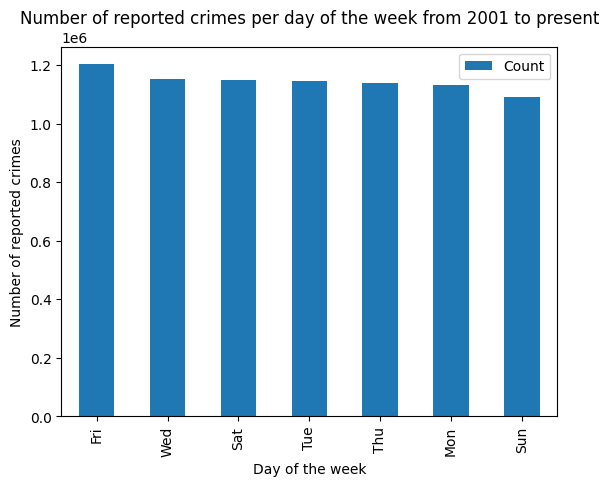

In [112]:
# Sorting and plotting the count of reported crimes per day of the week
cp.sort_values('Count', ascending=False).plot(kind='bar', x='Day_of_week', y='Count')
plt.xlabel('Day of the week')
plt.ylabel('Number of reported crimes')
plt.title('Number of reported crimes per day of the week from 2001 to present')

## RDDs setup

In [135]:
# Read the police station data from the CSV file using SparkContext's textFile method
psrdd = sc.textFile('police-station.csv')

# Display the first line of the RDD to inspect the data structure
psrdd.first()

'DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION'

In [136]:
# Display the first line of the RDD to inspect the data structure and store it as the header
ps_header = psrdd.first()

# Filter out the header line from the RDD
ps_rest = psrdd.filter(lambda line: line != ps_header)

**How many police stations are there?**

In [137]:
ps_split = ps_rest.map(lambda line: line.split(','))

24

**Display the District ID, District name, Address and Zip for the police station with District ID 7**



In [133]:
(ps_rest.filter(lambda line:line.split(',')[0] == '7').
 map(lambda line: (line.split(',')[0],
                   line.split(',')[1],
                   line.split(',')[2],
                   line.split(',')[5])).collect())

[('7', 'Englewood', '1438 W 63rd St', '60636')]

**Police stations 10 and 11 are geographically close to each other. Display the District ID, District name, address and zip code**

In [134]:
(ps_rest.filter(lambda line: line.split(',')[0] in ['10','11']).
 map(lambda line: (line.split(',')[1],
                   line.split(',')[2],
                   line.split(',')[5])).collect())

[('Ogden', '3315 W Ogden Ave', '60623'),
 ('Harrison', '3151 W Harrison St', '60612')]